All this comes from http://austinrochford.com/posts/2015-08-29-additive.html

In [24]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import patsy
import scipy as sp
#import seaborn as sns
#from statsmodels import api as sm

from pygam import LinearGAM
#from pygam.utils import generate_X_grid

#### This version will use P and board temp as the two diagnostic variables for mass 28.  Am going to restrict to a small region.

In [25]:
from itertools import chain
pth = '/Users/suelto/GDrive/research/ZIPP/ZIPP2_EN602/EN602_Loose/science/UMS/MS Data/'

#massspec_15_1 = pd.read_table(pth+'MSData_7_15_2017 22_44.dfData',sep='\t',parse_dates=[0], header=0, low_memory=False,encoding='latin1')
#ms = massspec_15_1.iloc[4064:6883, :]

massspec_12_1 = pd.read_table(pth+'MSData_7_12_2017 21_08.dfData',sep='\t',parse_dates=[0], header=0, low_memory=False)
massspec_12_1.dropna(axis=0, how='all')
ms = massspec_12_1.iloc[5858:9895, :]



/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: read_table is deprecated, use read_csv instead.
  import sys


In [48]:
#mass28=massspec.iloc[:,63].astype('float')
#mass32=massspec.iloc[:,64].astype('float')
#mass40=massspec.iloc[:,66].astype('float')
#mass44=massspec.iloc[:,67].astype('float')
#mass5=massspec.iloc[:,57].astype('float')

hdrs = ms.columns.values
idx = [62,5,36,28,57,3]
#idx = [57,36,28,62,3,5]
#idx = 62
print(hdrs[idx])

['MASS( 18 )' 'Temperature (C) Temperature (C) ' 'uC Temp. (\xb0C)'
 'Sample Temperature (\xb0C)' 'MASS( 5 )' 'Pressure (db)']


In [49]:
ms = ms.dropna(how='all')
#np.sum(pd.isnull(ms2))

In [50]:
df = pd.DataFrame(ms[hdrs[idx]])
target_df = pd.Series(ms[hdrs[64]])
#This is Gas, but normalized.
#df.head()

In [51]:
from pygam import LinearGAM, s, l
X = df.interpolate(method='linear', order=1, limit_direction='both')
y = target_df 

### Make a division between test and train data:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)
#X_train = df[:][(target_df.index<4500)|(target_df.index>6500)]
#y_train = target_df.loc[(target_df.iloc<4500)|(target_df.iloc>6500)]
#y_train = target_df[(target_df.index<4500)|(target_df.index>6500)]
X_train = X
y_train = y

#lam = [0.01,0.01,1,0.01,1,1]
lam = [1,1,1,1,1,1,1]
#gam = LinearGAM(n_splines=5,lam=lam,penalties='derivative').fit(X_train, y_train)

gam = LinearGAM(l(0)+s(1)+s(2)+s(3)+s(4)+s(5)).fit(X,y)

gam.gridsearch(X, y)
#gam = LinearGAM(n_splines=10).gridsearch(X, y)

gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      63.784
Link Function:                     IdentityLink Log Likelihood:                    -1.8279042181859043e+28
Number of Samples:                         4037 AIC:                                3.6558084363718086e+28
                                                AICc:                               3.6558084363718086e+28
                                                GCV:                                                   0.0
                                                Scale:                                                 0.0
                                                Pseudo R-Squared:                                   0.9724
Feature Function                  Lam

/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:23: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



In [52]:
X.isnull().sum()

MASS( 18 )                          0
Temperature (C) Temperature (C)     0
uC Temp. (�C)                       0
Sample Temperature (�C)             0
MASS( 5 )                           0
Pressure (db)                       0
dtype: int64

/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


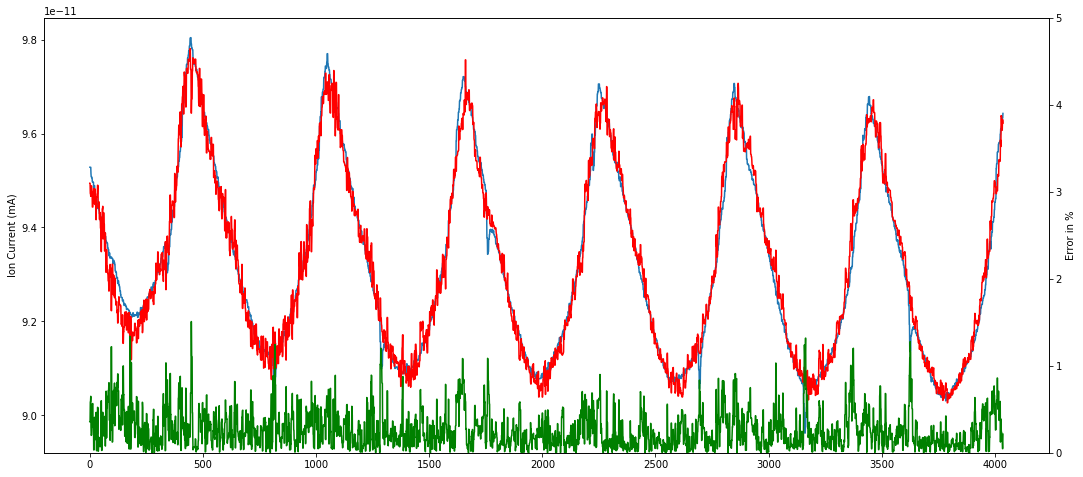

In [53]:
f1,ax = plt.subplots();

plt.plot(y.as_matrix())

yy = gam.predict(X) 
plt.plot(yy,'r')
#plt.ylim(7e-11,9e-11)
#plt.ylim(0.02,0.06)
plt.ylabel('Ion Current (mA)')
ax2 = ax.twinx()

err = np.sqrt((y.as_matrix()-yy)**2)/y.as_matrix()*100
plt.plot(err,'g')
plt.ylim(0,5)
plt.ylabel('Error in %')
plt.show()

/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


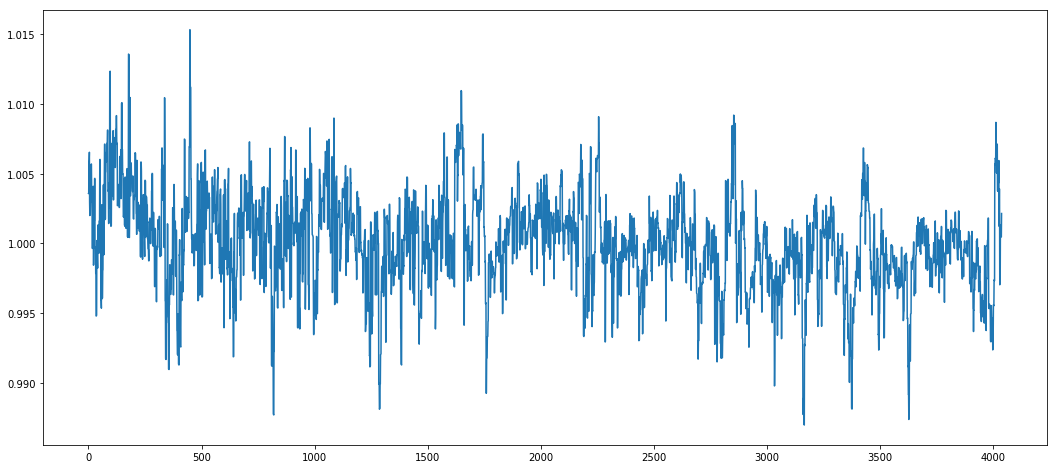

In [54]:
plt.figure()
plt.plot(y.as_matrix()/yy)
plt.show()

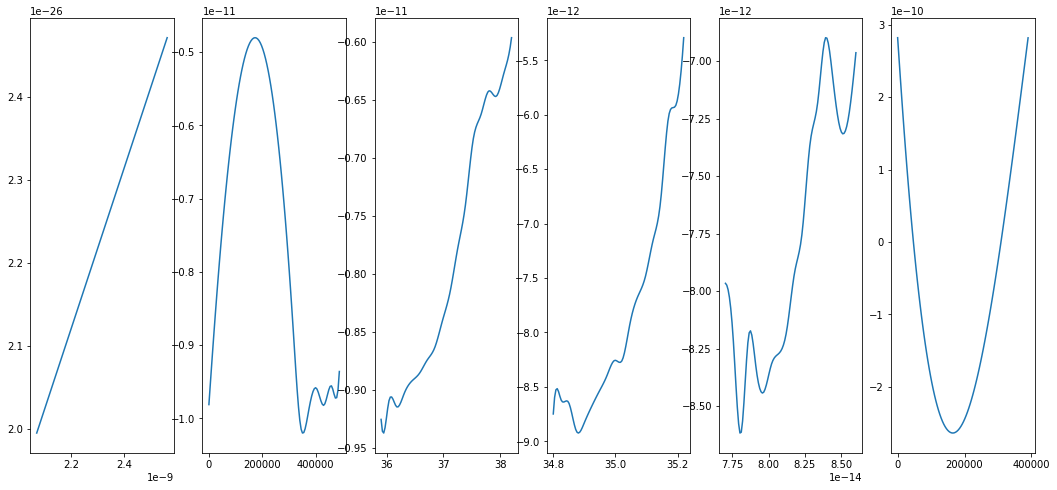

In [55]:
plt.rcParams['figure.figsize'] = (18, 8)
fig, axs = plt.subplots(1, len(hdrs[idx]))
titles = hdrs[idx]
for i, ax in enumerate(axs):

    XX = gam.generate_X_grid(term=i)
    #ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    #ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    
    #ax.set_title(titles[i]);
    pdep = gam.partial_dependence(term=i, X=XX)
    ax.plot(XX[:, i], pdep)
    #ax.plot(XX[:, i], confi[0][:, 0], c='grey', ls='--')
    #ax.plot(XX[:, i], confi[0][:, 1], c='grey', ls='--')
    #ax.set_title(titles[i],fontsize=12)
plt.show()

UnicodeDecodeError: 'ascii' codec can't decode byte 0xb0 in position 10: ordinal not in range(128)

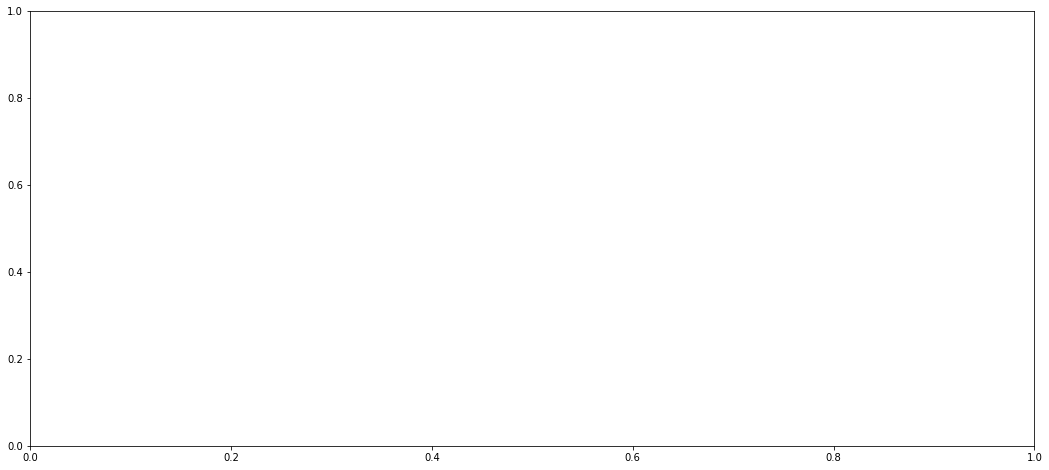

In [56]:
XX = gam.generate_X_grid(term=0)
plt.figure()
plt.plot(X.iloc[:,2].astype(float))

In [121]:
#Now try to test on the next day's calibration data
#fil = 'MSData_7_14_2017 21_13.dfData'
massspec_15_1 = pd.read_table(pth+'MSData_7_15_2017 22_44.dfData',sep='\t',parse_dates=[0], header=0, low_memory=False,encoding='latin1')
mss = massspec_15_1.iloc[4064:6883, :]
mss = mss.dropna(how='any')

hdr15 = mss.columns.values



In [122]:
X15 = pd.DataFrame(mss[hdr15[idx]])
Y15 = pd.Series(mss[hdr15[64]])
#Y15 = pd.Series(mss[hdr15[64]])/mss[hdr15[62]]


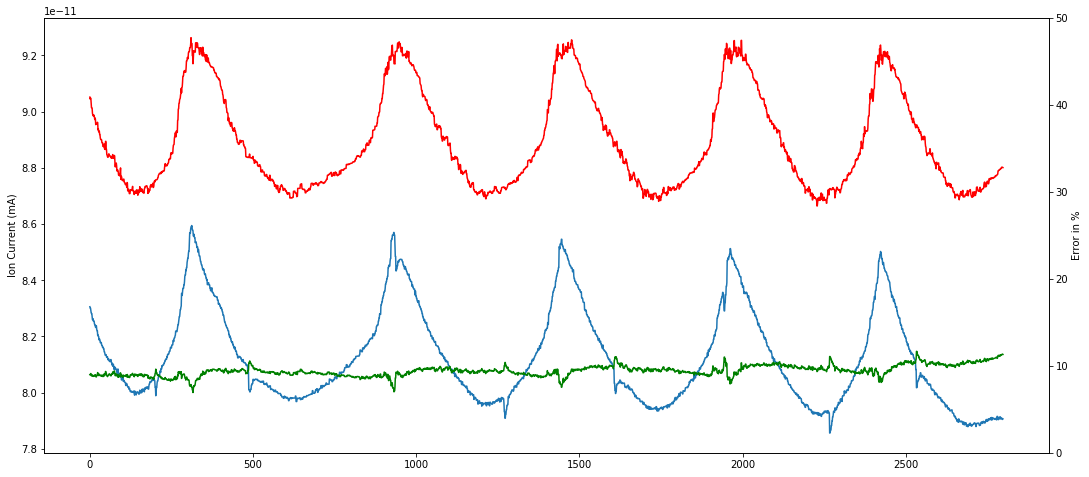

In [124]:
f2,ax2 = plt.subplots();

plt.plot(Y15.as_matrix())


#scale15 = 1e-9/np.mean(X15[hdr15[idx[-1]]])
#X15[hdr15[idx[-1]]] = X15[hdr15[idx[-1]]]*scale15

yy15 = gam.predict(X15) 
plt.plot(yy15,'r')
#plt.ylim(2e-11,13e-11)
#plt.ylim(0.01,0.1)
plt.ylabel('Ion Current (mA)')
ax3 = ax2.twinx()

err = np.sqrt((Y15.as_matrix()-yy15)**2)/Y15.as_matrix()*100
plt.plot(err,'g')
plt.ylim(0,50)
plt.ylabel('Error in %')
plt.show()

In [125]:
from scipy import signal as sig
from scipy.interpolate import griddata
import gsw

In [11]:


pth2 = '/Users/phora/GDrive/research/ZIPP/ZIPP2_EN602/EN602_Loose/cleaned_data/ctd/'
data = np.load(pth2+'ZIPP2_CTD_Atlantic_clean.npz')

mdata = np.load(pth2+'ZIPP2_CTD_Atlantic.npz')
ctd_clean = data['ctd_clean_drop']
ms_info=mdata['massspec_info']
ms_info = pd.DataFrame(ms_info,index=pd.DatetimeIndex(mdata['dt']))
masses = pd.DataFrame(mdata['masses'],index=pd.DatetimeIndex(mdata['dt']))
masses = masses[~masses.index.duplicated(keep='first')]
ms_info = ms_info[~ms_info.index.duplicated(keep='first')]

ctd_clean = pd.DataFrame(ctd_clean, index=pd.DatetimeIndex(ctd_clean[:,0]))
ctd_clean = ctd_clean[~ctd_clean.index.duplicated(keep='first')]
ctd_clean = pd.concat([ctd_clean.iloc[1:,:],ms_info, masses], axis=1)
ctd_clean = ctd_clean.iloc[:,1:].apply(pd.to_numeric,errors='coerce')
ctd_clean = ctd_clean.dropna(axis=0, how='any')
ctd_clean = ctd_clean.reset_index()
ctd_clean = ctd_clean.as_matrix()


In [12]:

datet = ctd_clean[21:,0]
pressure = ctd_clean[:-21,1].astype('float')
depth = ctd_clean[:-21,2].astype('float')
water_temp = ctd_clean[:-21,3].astype('float')
sal = ctd_clean[:-21,5].astype('float')
o2 = ctd_clean[:-21,6].astype('float')
par = ((ctd_clean[:-21,10]/max(ctd_clean[:,10]))*100).astype('float')
lat = ctd_clean[:-21,12].astype('float')
lon = ctd_clean[:-21,13].astype('float')
samp_temp = ctd_clean[21:,21].astype('float')
board_temp = ctd_clean[21:,29].astype('float')
mass5 = ctd_clean[21:,31].astype('float')
mass32 = ctd_clean[21:,38].astype('float')
mass18 = ctd_clean[21:,36].astype('float')
mass28 = ctd_clean[21:,37].astype('float')
mass40 = ctd_clean[21:,39].astype('float')

In [13]:
#pressure = ctd_clean[:-21,1].astype('float')
#depth = ctd_clean[:-21,2].astype('float')
#water_temp = ctd_clean[:-21,3].astype('float')
#sal = ctd_clean[:-21,5].astype('float')
#samp_temp = ctd_clean[21:,21].astype('float')
#board_temp = ctd_clean[21:,29].astype('float')
#mass5 = ctd_clean[21:,31].astype('float')
#mass32 = ctd_clean[21:,38].astype('float')
#mass18 = ctd_clean[21:,36].astype('float')
#mass28 = ctd_clean[21:,37].astype('float')
#mass40 = ctd_clean[21:,39].astype('float')

#ctd_df = pd.DataFrame(ctd_clean[:-21,[1,3]])
#m_df = pd.DataFrame(ctd_clean[21:,[29,21,31]])
ctd_df = pd.DataFrame(ctd_clean[:,[36,3,29,21,31,1]])
                      


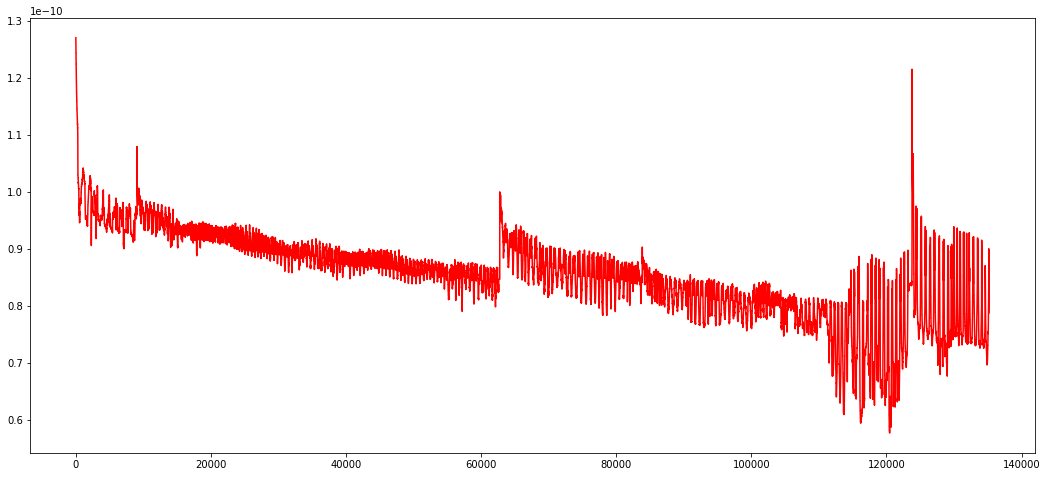

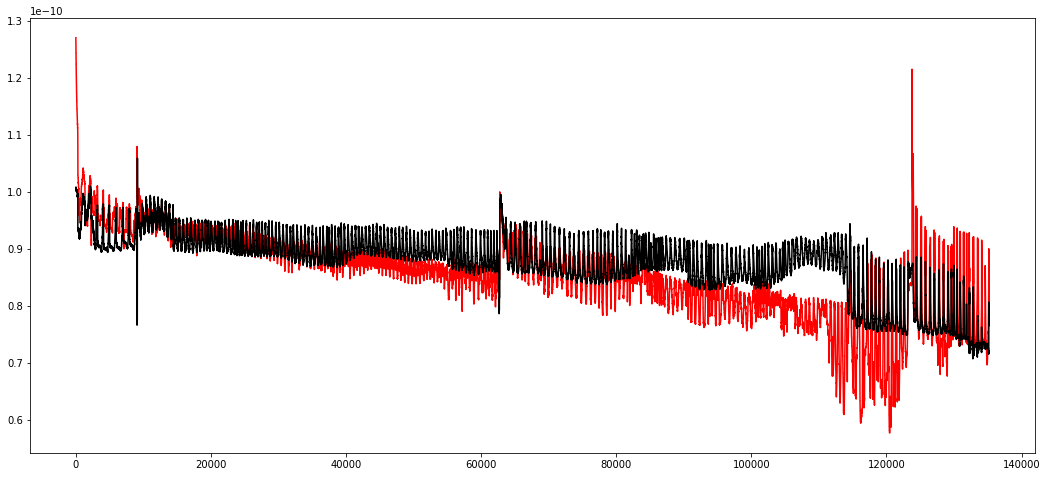

In [15]:
plt.figure()

#['MASS( 18 )' 'Temperature (C) Temperature (C) ' 'uC Temp. (\xb0C)'
# 'Sample Temperature (\xb0C)' 'MASS( 5 )' 'Pressure (db)']


#DF_Atl = pd.concat([ctd_df,m_df],axis=1)
DF_Atl = ctd_df

o2_predict = gam.predict(DF_Atl)

o2_obs = ctd_clean[:,38].astype('float')

plt.plot(o2_obs,'r')
#plt.plot(mass32/mass18,'g')
plt.plot(o2_predict,'k')


plt.xlim(0,10e3)
#plt.ylim(0.8,2)
plt.show()

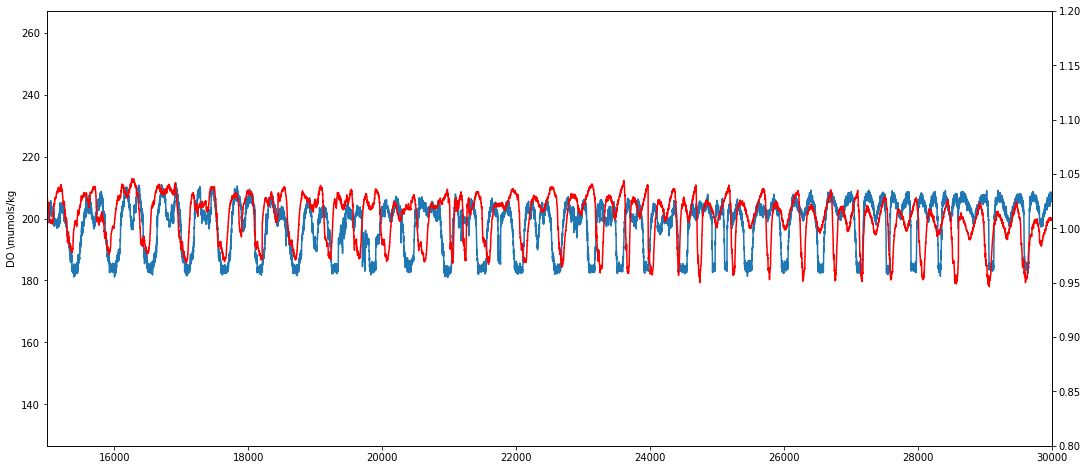

In [24]:
f5,ax5 = plt.subplots();
plt.plot(o2)
plt.xlim(15e3,30e3)

plt.ylabel('DO \mumols/kg')
ax6 = ax5.twinx()
#plt.plot(o2atl,'r')
plt.plot(o2_obs/o2_predict,'r')
plt.ylim(0.8,1.2)
plt.ylabel('')
plt.show()